## Aula 5: Visualização de Dados II

### Seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex'>

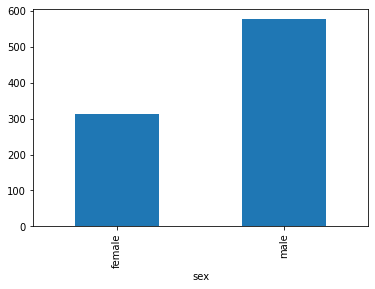

In [4]:
df_titanic.groupby('sex')['sex'].count().plot.bar()

<AxesSubplot:>

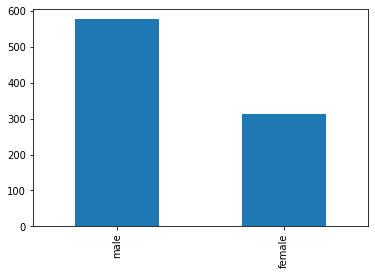

In [5]:
df_titanic['sex'].value_counts().plot.bar()

#### countplot

<AxesSubplot:xlabel='sex', ylabel='count'>

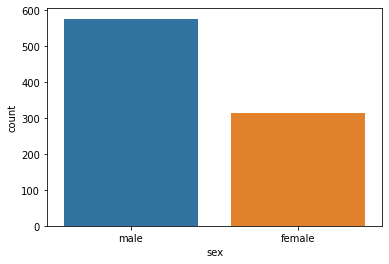

In [6]:
sns.countplot(data=df_titanic, x='sex')

#### barplot

<AxesSubplot:xlabel='sex'>

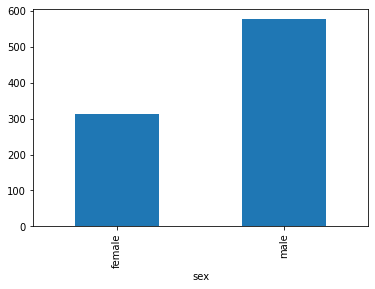

In [7]:
df_titanic.groupby('sex')['survived'].count().plot.bar()

<AxesSubplot:xlabel='sex', ylabel='survived'>

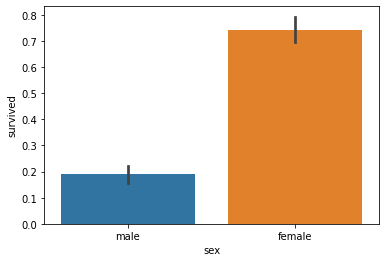

In [8]:
sns.barplot(data=df_titanic,x='sex',y='survived')

<AxesSubplot:xlabel='pclass', ylabel='survived'>

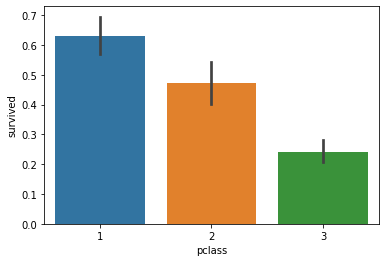

In [9]:
sns.barplot(data=df_titanic,x='pclass',y='survived')

#### boxplot

<AxesSubplot:xlabel='sex', ylabel='age'>

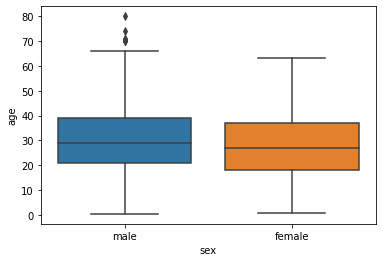

In [10]:
sns.boxplot(data=df_titanic,x='sex',y='age')

<AxesSubplot:xlabel='pclass', ylabel='age'>

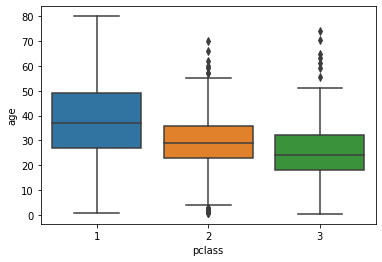

In [11]:
sns.boxplot(data=df_titanic,x='pclass',y='age')

<AxesSubplot:>

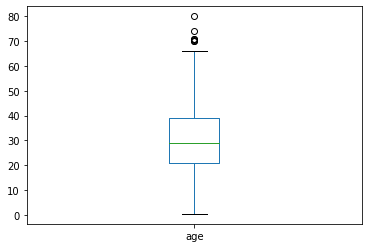

In [16]:
df_titanic[df_titanic.sex == 'male'].age.plot.box()

<AxesSubplot:>

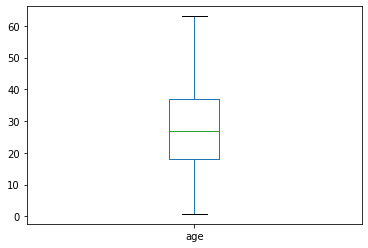

In [17]:
df_titanic[df_titanic.sex == 'female'].age.plot.box()

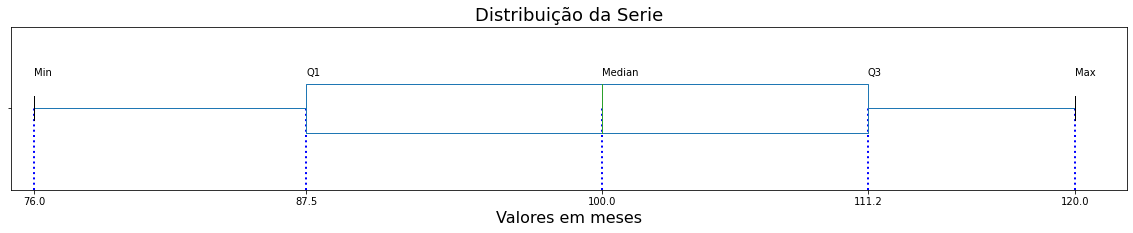

In [18]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.transforms as transforms

def generate_boxplot(box_series):
    fig, ax = plt.subplots(figsize=(20, 3))
    
    pd.Series(box_series).plot.box(vert=False, widths = 0.6, ax=ax)
    quantiles = np.quantile(box_series, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
    ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
              color='b', ls=':', lw=2, zorder=0)

    ax.set_xlim(left=75)
    ax.set_ylim(0 ,2)

    ax.set_xticks(quantiles)
    ax.set_yticklabels([])


    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    trans_x = transforms.blended_transform_factory(
        ax.get_xticklabels()[0].get_transform(), ax.transData)

    for x, label in zip(list(quantiles), ['Min', 'Q1', 'Median', 'Q3', 'Max']):
        ax.text(x,1.5, label, color="black", transform=trans_x, 
            ha="left", va="top")
    
    plt.title('Distribuição da Serie', fontsize=18)
    plt.xlabel('Valores em meses', fontsize=16)
    plt.show()

box_series = [100,110,120,115,90,80,76,100]
generate_boxplot(box_series)

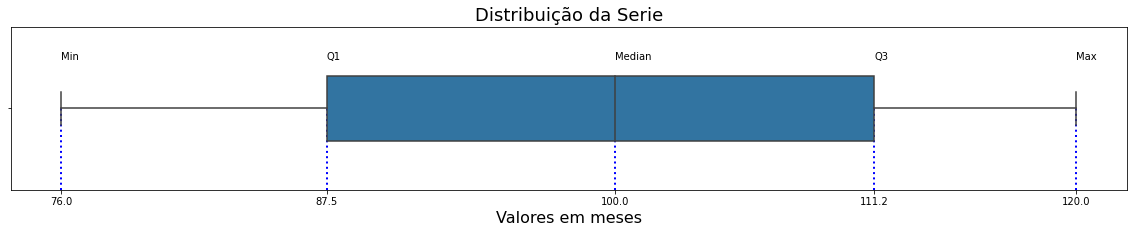

In [20]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.transforms as transforms

def generate_boxplot(box_series):
    fig, ax = plt.subplots(figsize=(20, 3))
    
    sns.boxplot(x=pd.Series(box_series), ax=ax)
    quantiles = np.quantile(box_series, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
    ax.vlines(quantiles, [-1] * quantiles.size, [0] * quantiles.size,
              color='b', ls=':', lw=2, zorder=0)

#     ax.set_xlim(left=0)
    ax.set_ylim(-1 ,1)

    ax.set_xticks(quantiles)
    ax.set_yticklabels([])


    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    trans_x = transforms.blended_transform_factory(
        ax.get_xticklabels()[0].get_transform(), ax.transData)

    for x, label in zip(list(quantiles), ['Min', 'Q1', 'Median', 'Q3', 'Max']):
        ax.text(x,0.7, label, color="black", transform=trans_x, 
            ha="left", va="top")
    
    plt.title('Distribuição da Serie', fontsize=18)
    plt.xlabel('Valores em meses', fontsize=16)
    plt.show()

box_series = [100,110,120,115,90,80,76,100]
generate_boxplot(box_series)

#### displot

In [21]:
sns.__version__

'0.11.1'

In [24]:
#KDE -> https://en.wikipedia.org/wiki/Kernel_density_estimation

/home/lucas_bgabriel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

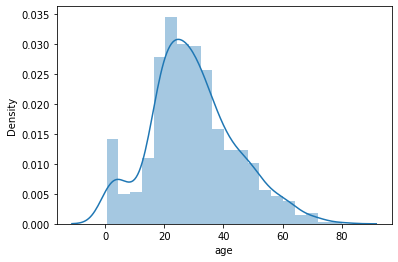

In [23]:
sns.distplot(df_titanic['age'].dropna())

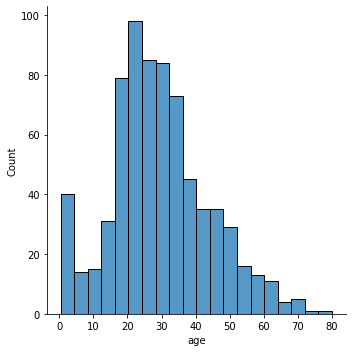

In [22]:
sns.displot(df_titanic['age'].dropna())

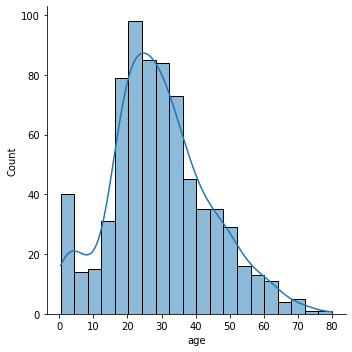

In [25]:
sns.displot(df_titanic['age'].dropna(), kde=True)

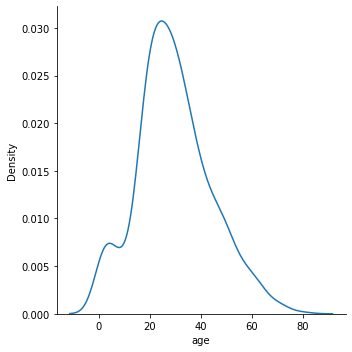

In [26]:
sns.displot(df_titanic['age'].dropna(), kind='kde')

<AxesSubplot:xlabel='age', ylabel='Count'>

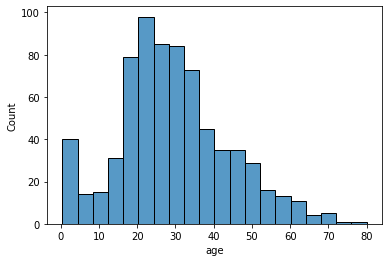

In [28]:
sns.histplot(df_titanic['age'].dropna())

<AxesSubplot:xlabel='age', ylabel='Density'>

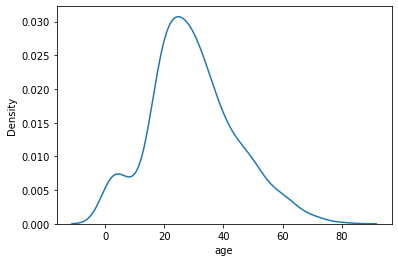

In [30]:
sns.kdeplot(df_titanic['age'].dropna())

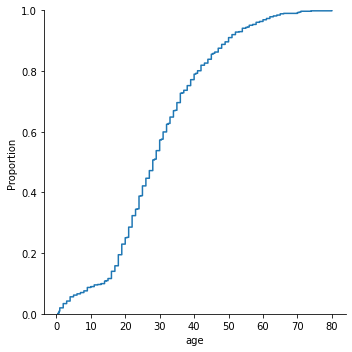

In [27]:
sns.displot(df_titanic['age'].dropna(), kind='ecdf')

In [31]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
df_titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [34]:
df_titanic.select_dtypes(include=['category'])

,class,deck
0,Third,NaN
1,First,C
2,Third,NaN
3,First,C
4,Third,NaN
...,...,...
886,Second,NaN
887,First,B
888,Third,NaN
889,First,C


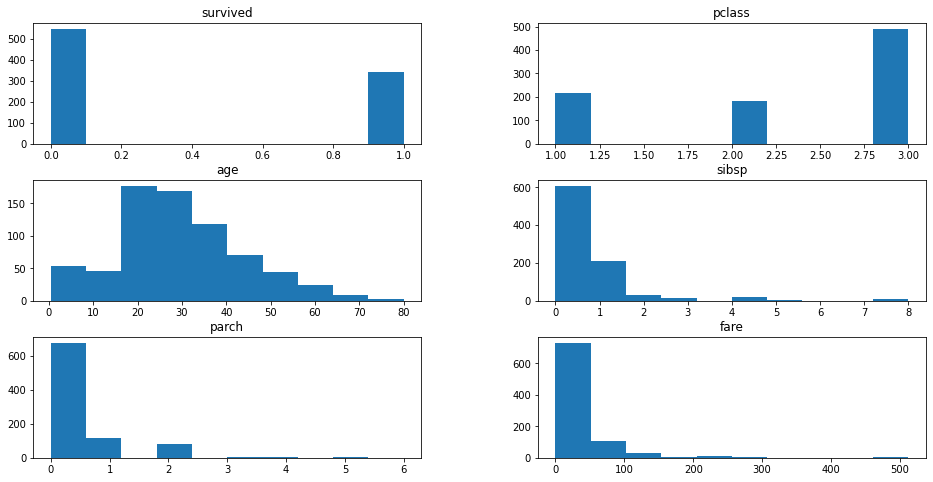

In [37]:
df_titanic.select_dtypes(exclude=['object', 'bool', 'category']).hist(figsize=(16, 8), grid=False)
plt.show()

### graficos de regressão

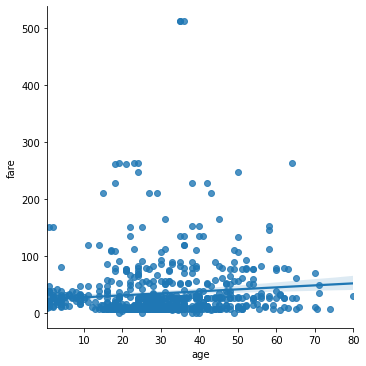

In [38]:
sns.lmplot(data=df_titanic,x='age',y='fare')

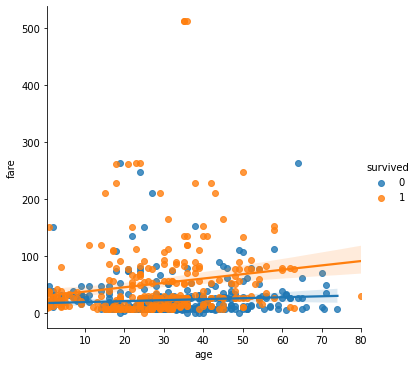

In [39]:
sns.lmplot(data=df_titanic,x='age',y='fare', hue='survived')

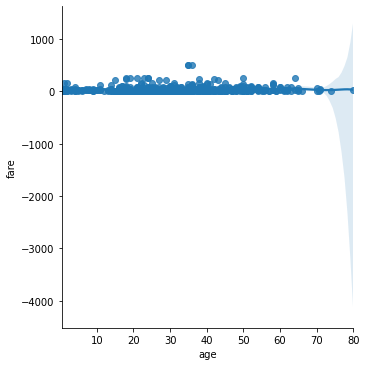

In [51]:
sns.lmplot(data=df_titanic,x='age',y='fare', order=10)

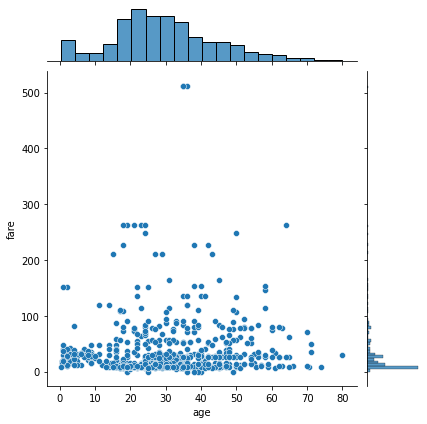

In [52]:
sns.jointplot(data=df_titanic,x='age',y='fare')

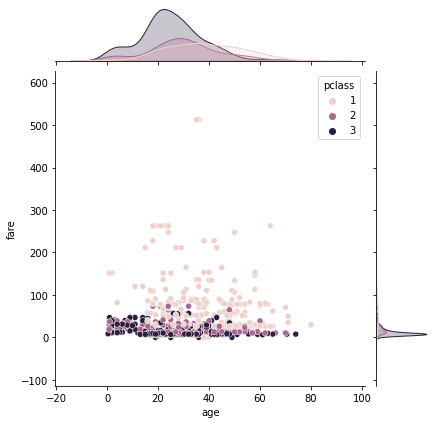

In [53]:
sns.jointplot(data=df_titanic,x='age',y='fare', hue='pclass')

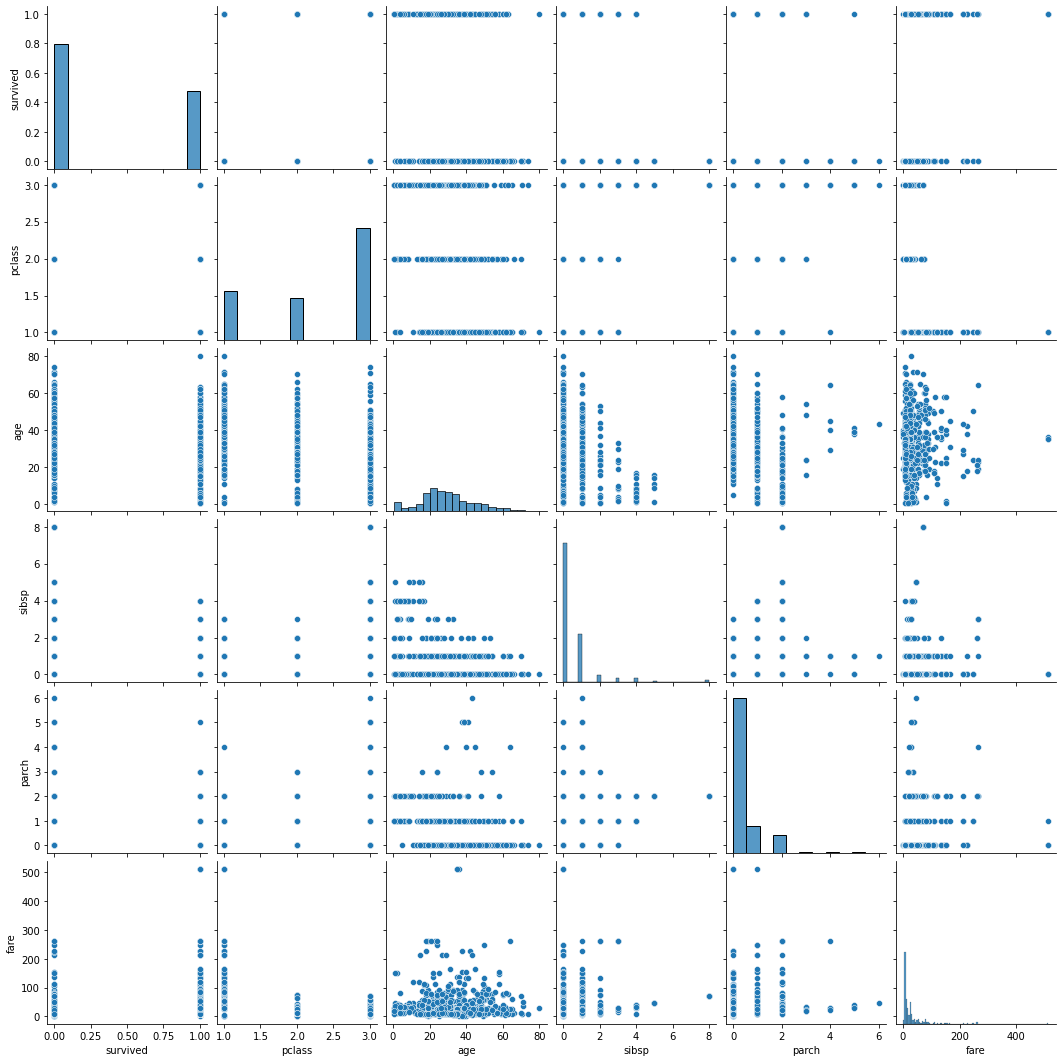

In [54]:
sns.pairplot(df_titanic.select_dtypes(exclude=['object', 'bool']))

#### Tips

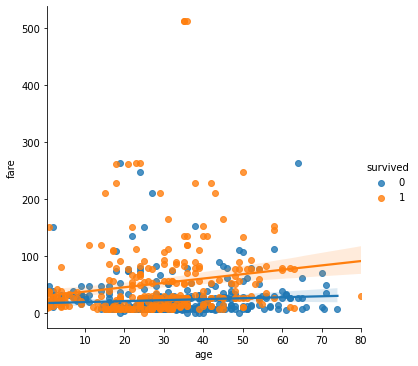

In [55]:
sns.lmplot(data=df_titanic,x='age',y='fare', hue='survived')

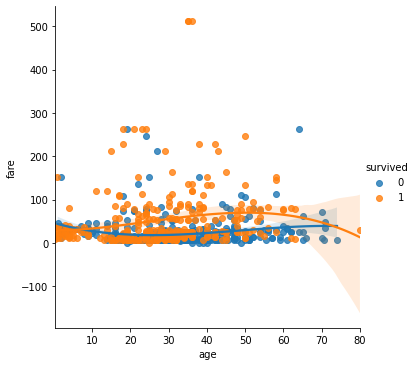

In [56]:
sns.lmplot(data=df_titanic,x='age',y='fare', hue='survived', order=3)

#### Exemplo Turismo

In [58]:
df_tourist = pd.read_csv('../datasets/touristData.csv')

In [59]:
df_tourist.head()

,Continent,Country,State,WayIn,Year,Month,Count
0,Africa,South Africa,Amazonas,Air,1989,janeiro,9.0
1,Africa,Angola,Amazonas,Air,1989,janeiro,0.0
2,Africa,Nigeria,Amazonas,Air,1989,janeiro,0.0
3,Africa,Other countries,Amazonas,Air,1989,janeiro,0.0
4,Central America and Caribbean,Costa Rica,Amazonas,Air,1989,janeiro,6.0


In [60]:
df = df_tourist.pivot_table(values='Count',index='Month',columns='Year',aggfunc=sum)
df

Year,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,,,,,,,,,,,,
abril,84867.0,76761.0,78601.0,109479.0,108956.0,114747.0,151306.0,172621.0,183015.0,327809.0,...,388895.0,370897.0,330477.0,384682.0,336904.0,438939.0,422254.0,407970.0,389943.0,414084.0
agosto,81535.0,75260.0,72580.0,93824.0,87463.0,97957.0,134755.0,216947.0,194436.0,316746.0,...,339090.0,333052.0,384670.0,338662.0,383661.0,384663.0,397683.0,407349.0,401094.0,366300.0
dezembro,124758.0,109460.0,123984.0,134091.0,155749.0,158717.0,203304.0,217283.0,257054.0,422310.0,...,497557.0,490878.0,450088.0,386277.0,516103.0,560992.0,584357.0,586257.0,851783.0,784562.0
fevereiro,197348.0,143171.0,119275.0,192628.0,256369.0,246046.0,233949.0,313061.0,336753.0,604896.0,...,586846.0,548828.0,603529.0,553758.0,631655.0,579600.0,569706.0,548577.0,535096.0,719513.0
janeiro,291566.0,159677.0,209590.0,276049.0,323515.0,387604.0,323548.0,391270.0,471689.0,689080.0,...,772883.0,770791.0,735708.0,764468.0,687968.0,684469.0,749555.0,758573.0,580616.0,915056.0
julho,87054.0,92569.0,93996.0,115683.0,85307.0,124858.0,135093.0,223315.0,200536.0,341581.0,...,324150.0,417076.0,400763.0,299564.0,348485.0,386843.0,410667.0,534130.0,717769.0,454624.0
junho,66838.0,44946.0,62497.0,79662.0,51523.0,85086.0,104082.0,169651.0,157525.0,315289.0,...,307119.0,294677.0,300029.0,248456.0,295205.0,309905.0,342201.0,350025.0,1018876.0,350156.0
maio,69293.0,59930.0,64016.0,80243.0,62743.0,91521.0,113099.0,113440.0,159233.0,279378.0,...,315956.0,294020.0,284928.0,273186.0,298459.0,345517.0,345194.0,348137.0,349819.0,372818.0
março,149001.0,82008.0,106269.0,100415.0,142835.0,189297.0,177174.0,279834.0,289794.0,537395.0,...,475380.0,461894.0,535361.0,485572.0,531352.0,503234.0,584163.0,650651.0,329779.0,619939.0


In [66]:
df.index

Index(['abril', 'agosto', 'dezembro', 'fevereiro', 'janeiro', 'julho', 'junho',
       'maio', 'março', 'novembro', 'outubro', 'setembro'],
      dtype='object', name='Month')

<AxesSubplot:xlabel='Year', ylabel='Month'>

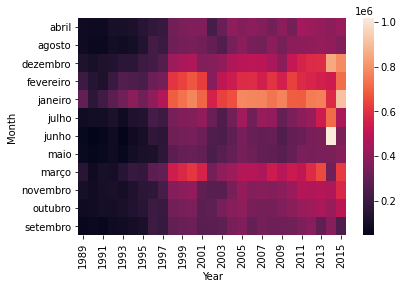

In [61]:
sns.heatmap(df)

In [67]:
df_tourist.head()

,Continent,Country,State,WayIn,Year,Month,Count
0,Africa,South Africa,Amazonas,Air,1989,janeiro,9.0
1,Africa,Angola,Amazonas,Air,1989,janeiro,0.0
2,Africa,Nigeria,Amazonas,Air,1989,janeiro,0.0
3,Africa,Other countries,Amazonas,Air,1989,janeiro,0.0
4,Central America and Caribbean,Costa Rica,Amazonas,Air,1989,janeiro,6.0


In [68]:
df_tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534792 entries, 0 to 534791
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Continent  534792 non-null  object 
 1   Country    534792 non-null  object 
 2   State      534792 non-null  object 
 3   WayIn      534792 non-null  object 
 4   Year       534792 non-null  int64  
 5   Month      534792 non-null  object 
 6   Count      528600 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 28.6+ MB


In [69]:
df_tourist['Month'].unique()

array(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho',
       'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
      dtype=object)

In [70]:
df_tourist['Month'] = pd.Categorical(df_tourist['Month'], 
                                     categories=['janeiro', 'fevereiro', 'março',
                                                 'abril', 'maio', 'junho', 'julho',
                                                 'agosto', 'setembro', 'outubro', 
                                                 'novembro', 'dezembro'], ordered=True)

In [71]:
df_tourist['Month']

0          janeiro
1          janeiro
2          janeiro
3          janeiro
4          janeiro
            ...   
534787    dezembro
534788    dezembro
534789    dezembro
534790    dezembro
534791    dezembro
Name: Month, Length: 534792, dtype: category
Categories (12, object): ['janeiro' < 'fevereiro' < 'março' < 'abril' ... 'setembro' < 'outubro' < 'novembro' < 'dezembro']

In [72]:
df = df_tourist.pivot_table(values='Count',index='Month',columns='Year',aggfunc=sum)
df

Year,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,,,,,,,,,,,,
janeiro,291566.0,159677.0,209590.0,276049.0,323515.0,387604.0,323548.0,391270.0,471689.0,689080.0,...,772883.0,770791.0,735708.0,764468.0,687968.0,684469.0,749555.0,758573.0,580616.0,915056.0
fevereiro,197348.0,143171.0,119275.0,192628.0,256369.0,246046.0,233949.0,313061.0,336753.0,604896.0,...,586846.0,548828.0,603529.0,553758.0,631655.0,579600.0,569706.0,548577.0,535096.0,719513.0
março,149001.0,82008.0,106269.0,100415.0,142835.0,189297.0,177174.0,279834.0,289794.0,537395.0,...,475380.0,461894.0,535361.0,485572.0,531352.0,503234.0,584163.0,650651.0,329779.0,619939.0
abril,84867.0,76761.0,78601.0,109479.0,108956.0,114747.0,151306.0,172621.0,183015.0,327809.0,...,388895.0,370897.0,330477.0,384682.0,336904.0,438939.0,422254.0,407970.0,389943.0,414084.0
maio,69293.0,59930.0,64016.0,80243.0,62743.0,91521.0,113099.0,113440.0,159233.0,279378.0,...,315956.0,294020.0,284928.0,273186.0,298459.0,345517.0,345194.0,348137.0,349819.0,372818.0
junho,66838.0,44946.0,62497.0,79662.0,51523.0,85086.0,104082.0,169651.0,157525.0,315289.0,...,307119.0,294677.0,300029.0,248456.0,295205.0,309905.0,342201.0,350025.0,1018876.0,350156.0
julho,87054.0,92569.0,93996.0,115683.0,85307.0,124858.0,135093.0,223315.0,200536.0,341581.0,...,324150.0,417076.0,400763.0,299564.0,348485.0,386843.0,410667.0,534130.0,717769.0,454624.0
agosto,81535.0,75260.0,72580.0,93824.0,87463.0,97957.0,134755.0,216947.0,194436.0,316746.0,...,339090.0,333052.0,384670.0,338662.0,383661.0,384663.0,397683.0,407349.0,401094.0,366300.0
setembro,62629.0,69360.0,60951.0,81560.0,88219.0,99203.0,111161.0,201255.0,184076.0,291200.0,...,298652.0,333121.0,320722.0,318889.0,330083.0,345535.0,378394.0,286228.0,373555.0,243336.0


Text(0.5, 1.0, 'Viagens por mês por ano')

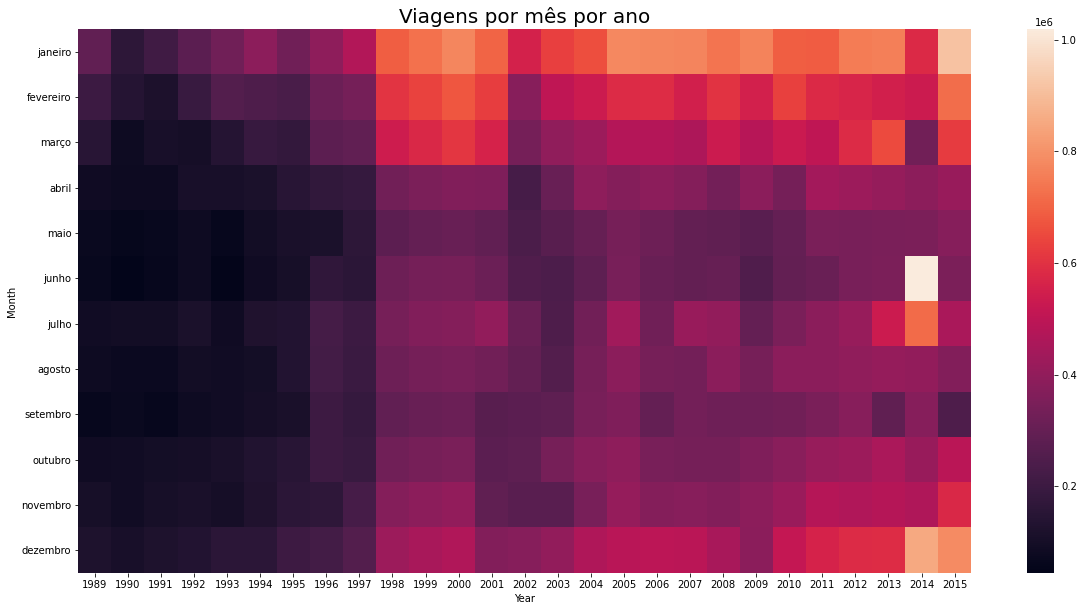

In [76]:
plt.figure(figsize=(20, 10))
sns.heatmap(df)
plt.title('Viagens por mês por ano', fontsize=20)

In [77]:
df.to_excel('viagens.xlsx')

In [78]:
df.to_excel('viagens2.xlsx', index=False)

In [79]:
df.index

CategoricalIndex(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho',
                  'julho', 'agosto', 'setembro', 'outubro', 'novembro',
                  'dezembro'],
                 categories=['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', ...], ordered=True, name='Month', dtype='category')

<AxesSubplot:xlabel='Year', ylabel='Month'>

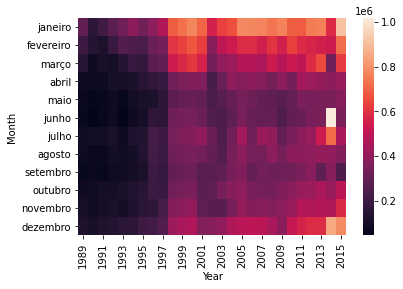

In [80]:
sns.heatmap(df)

In [81]:
df_tourist['Month'].cat.codes

0          0
1          0
2          0
3          0
4          0
          ..
534787    11
534788    11
534789    11
534790    11
534791    11
Length: 534792, dtype: int8

In [82]:
df_tourist['month_codes'] = df_tourist['Month'].cat.codes

In [83]:
df_tourist['month_codes'].value_counts()

0     44566
1     44566
2     44566
3     44566
4     44566
5     44566
6     44566
7     44566
8     44566
9     44566
10    44566
11    44566
Name: month_codes, dtype: int64

In [ ]:
df.to_csv()

In [ ]:
 df_tourist['Month'].value_counts()

In [84]:
df_tourist.corr()

,Year,Count,month_codes
Year,1.000000e+00,0.027143,-1.991669e-14
Count,2.714255e-02,1.000000,-1.707893e-02
month_codes,-1.991669e-14,-0.017079,1.000000e+00


In [85]:
df_tourist_pivot = df_tourist.pivot_table(values='Count',index='Month',columns='Year',aggfunc=np.mean)
df_tourist_pivot.head()

Year,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,,,,,,,,,,,,
janeiro,205.183673,116.382653,152.762391,187.788435,220.078231,282.510204,235.822157,285.182216,310.526004,453.640553,...,447.270255,472.298407,386.401261,413.673160,372.277056,370.383658,393.673845,436.966014,252.881533,389.054422
fevereiro,138.879662,104.352041,86.935131,131.039456,174.400680,179.333819,170.516764,228.178571,221.693878,398.219882,...,339.609954,336.291667,316.979517,299.652597,341.804654,313.636364,299.215336,316.000576,233.055749,305.915391
março,104.856439,59.772595,77.455539,68.309524,97.166667,137.971574,129.135569,203.960641,190.779460,353.782093,...,275.104167,283.023284,281.176996,262.755411,287.528139,272.312771,306.808298,374.798963,143.631969,263.579507
abril,59.723434,55.948251,57.289359,74.475510,74.119728,83.634840,110.281341,125.817055,120.483871,215.805793,...,225.054977,227.265319,173.569853,208.161255,182.307359,237.521104,221.772059,235.005760,169.835801,176.056122
maio,48.763547,43.680758,46.658892,54.587075,42.682313,66.706268,82.433673,82.682216,104.827518,183.922317,...,182.844907,180.159314,149.647059,147.827922,161.503788,186.968074,181.299370,200.539747,152.360192,158.511054


<AxesSubplot:xlabel='Year', ylabel='Month'>

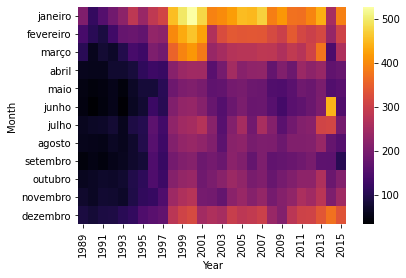

In [86]:
sns.heatmap(df_tourist_pivot,cmap='inferno')

### Gráficos 3D

In [90]:
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X,  Y
X.shape

(32,)

In [92]:
Y

array([-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75])

In [91]:
X

array([-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75])

In [88]:
X, Y = np.meshgrid(X, Y)
X.shape

(32, 32)

In [89]:
X

array([[-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
       [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
       [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
       ...,
       [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
       [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75],
       [-4.  , -3.75, -3.5 , ...,  3.25,  3.5 ,  3.75]])

In [94]:
Y

array([-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75])

<ipython-input-99-72ee512e7838>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


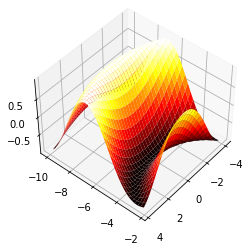

In [99]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(10, 3))
X = np.arange(-4, 4, 0.25)
Y = np.arange(-10, -2, 0.25)

ax = Axes3D(fig)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

ax.view_init(45, 40)
plt.show()